In [28]:
from core.trade_service.instruments.moving_averages import MA

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('../data/BTCUSDT-1h-data.csv')

In [57]:
#features from japan
data['close_delta_change_lag1'] = (data.close - data.close.shift()) * 100 / data.close.shift() 
data['size_open_close'] = (data.close - data.open)*100 / data.open
data['size_high_low'] = (data.high - data.low)*100 / data.low
data['open_position'] = (data.open - data.low) / (data.high - data.low)
data['close_position'] = (data.close - data.low) / (data.high - data.low)
data['ma_14'] = MA('close', 14).evaluate(data)
data['ma_25'] = MA('close', 25).evaluate(data)
data['ma_cross_14_25'] = data.ma_14 - data.ma_25
data['shift_ma_14_lag1'] = (data.ma_14 - data.ma_14.shift()) * 100 / data.ma_14.shift() 
data['shift_ma_14_lag4'] = (data.ma_14 - data.ma_14.shift(4)) * 100 / data.ma_14.shift() 
data['shift_ma_14_lag10'] = (data.ma_14 - data.ma_14.shift(10)) * 100 / data.ma_14.shift() 
data['shift_ma_25_lag1'] = (data.ma_25 - data.ma_25.shift()) * 100 / data.ma_25.shift() 
data['shift_ma_25_lag4'] = (data.ma_25 - data.ma_25.shift(4)) * 100 / data.ma_25.shift() 
data['shift_ma_25_lag10'] = (data.ma_25 - data.ma_25.shift(10)) * 100 / data.ma_25.shift() 
data['close_in_5'] =  (data.close.shift(-5) - data.close) * 100 / data.close
data['close_in_5_binary'] =  data.close.shift(-5) > data.close

In [75]:
data = data.dropna()

In [86]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [110]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [99]:
model = Pipeline([('scaler', StandardScaler()), ('classifier', MLPClassifier((50,10),verbose=1))])

In [112]:
np.random.seed(42)
train_columns = ['close_delta_change_lag1', 'size_open_close', 'size_high_low',
       'close_position', 'open_position', 'ma_cross_14_25',
       'shift_ma_14_lag1', 'shift_ma_14_lag4', 'shift_ma_14_lag10',
       'shift_ma_25_lag1', 'shift_ma_25_lag4', 'shift_ma_25_lag10']
target_binario = 'close_in_5_binary'
target_regressor = 'close_in_5'

X_train, X_test, y_trainb, y_testb, y_trainr, y_testr = train_test_split(data[train_columns], data[target_binario], data[target_regressor])

In [113]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.70138329
Iteration 2, loss = 0.68933161
Iteration 3, loss = 0.68710732
Iteration 4, loss = 0.68508754
Iteration 5, loss = 0.68374601
Iteration 6, loss = 0.68286112
Iteration 7, loss = 0.68219873
Iteration 8, loss = 0.68199165
Iteration 9, loss = 0.68160990
Iteration 10, loss = 0.68095353
Iteration 11, loss = 0.68040568
Iteration 12, loss = 0.67995695
Iteration 13, loss = 0.68019359
Iteration 14, loss = 0.67957266
Iteration 15, loss = 0.67936775
Iteration 16, loss = 0.67900470
Iteration 17, loss = 0.67910386
Iteration 18, loss = 0.67861686
Iteration 19, loss = 0.67940917
Iteration 20, loss = 0.67833009
Iteration 21, loss = 0.67807849
Iteration 22, loss = 0.67785297
Iteration 23, loss = 0.67725954
Iteration 24, loss = 0.67725653
Iteration 25, loss = 0.67679228
Iteration 26, loss = 0.67641904
Iteration 27, loss = 0.67675115
Iteration 28, loss = 0.67659043
Iteration 29, loss = 0.67574123
Iteration 30, loss = 0.67553552
Iteration 31, loss = 0.67497091
Iteration 32, los

/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(50, 10), verbose=1))])

In [114]:
roc_auc_score(y_test, model.predict(X_test))

0.5404094269363676

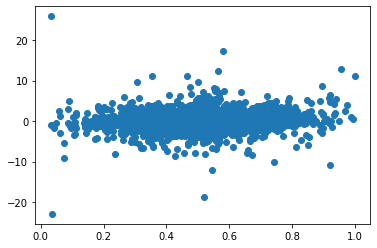

In [116]:
plt.scatter(model.predict_proba(X_test)[:,1], y_testr)